In [1]:
from scipy.spatial import HalfspaceIntersection, ConvexHull
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

def render_inequalities(halfspaces, feasible_point, xlim, ylim):
    hs = HalfspaceIntersection(np.array(halfspaces), feasible_point)
    fig = plt.figure()
    ax = fig.add_subplot('111', aspect='equal')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    x = np.linspace(*xlim, 100)

    for h in halfspaces:
        if h[1]== 0:
            ax.axvline(-h[2]/h[0], color="#2c3e50")
        else:
            ax.plot(x, (-h[2]-h[0]*x)/h[1], color="#2c3e50")
    x, y = zip(*hs.intersections)
    points = list(zip(x, y))
    convex_hull = ConvexHull(points)
    polygon = Polygon([points[v] for v in convex_hull.vertices], color="#34495e")
    ax.add_patch(polygon)
    ax.plot(x, y, 'o', color="#e67e22")

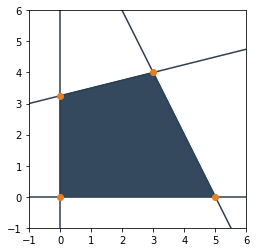

In [2]:
halfspaces = [
    [-1, 0., 0.],    # x₁ ≥ 0
    [0., -1., 0.],   # x₂ ≥ 0
    [-1., 4., -13.], # 4x₂ - x₁ ≤ 13
    [2., 1., -10.]   # x₂ + 2x₁ ≤ 10
]
feasible_point = np.array([0.5, 0.5])
xlim = (-1, 6)
render_inequalities(halfspaces, feasible_point, xlim, xlim)
plt.show()

In [3]:
a = [
    [-1, 4, 1, 0],
    [2, 1, 0, 1],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
]
b = [13, 10, 0, 0]
x1, x2, x3, x4 = np.linalg.solve(a, b)
print('x1 =', x1)
print('x2 =', x2)

x1 = 3.0
x2 = 4.0


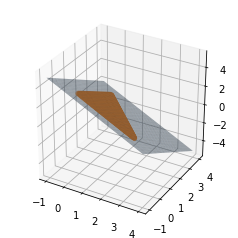

In [7]:
from mpl_toolkits.mplot3d import Axes3D

plt3d = plt.figure().gca(projection='3d', aspect='equal')

# plane: a*x1 + b*x2 + c*x3 + d = 0
normal = [1, 1, 1]
point = [1, 1, 1]
d = -3

xx, yy = np.meshgrid(np.linspace(-1, 4, 100), np.linspace(-1, 4, 100))
zz = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]
plt3d.plot_surface(
    xx,
    yy,
    zz,
    alpha=0.5,
    color="#34495e"
)

ax = plt.gca()
for row_i, row in enumerate(xx):
    x_row = []
    y_row = []
    z_row = []
    for column_i, x in enumerate(row):
        y = yy[row_i][column_i]
        z = zz[row_i][column_i]
        if x < 0 or y < 0 or z < 0:
            continue

        x_row.append(x)
        y_row.append(y)
        z_row.append(z)
    if len(x_row) > 0:
        ax.scatter(
            x_row,
            y_row,
            z_row,
            color="#e67e22"
        )

plt.show()